In [ ]:
# The experiments done in notebooks are on Arm Juno r2 board. CPU0-3 are
# little cores with capacity of 383. CPU4-5 are big cores.

In [ ]:
import logging
from lisa.utils import setup_logging
setup_logging()

from lisa.target import Target, TargetConf

from lisa.wlgen.rta import RTA

import os
from lisa.trace import FtraceCollector

from lisa.trace import Trace

import holoviews as hv
from lisa.platforms.platinfo import PlatformInfo
from lisa.trace import TaskID

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
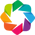

In [2]:
def provide_calibration(calibration):
    target.plat_info["rtapp"].add_src("user", {"calib" : calibration})

def set_cas_mode():
    target.cpufreq.set_all_governors('ondemand')

def create_data_frame(trace, event, task = '', cpu = '-1'):
    df = trace.df_event(event)
    df = df.copy()
    if event.endswith('_se'):
        df = df[(df['comm'] == task)]
    elif event.endswith('_cfs'):
        if event.startswith('sched'):
            df = df[(df['path'] == '/')]
        df = df[(df['cpu'] == cpu)]
    elif event.endswith('cpu_frequency'):
        df = df[(df['__cpu'] == cpu)]
        df.state = df.state / 1000
    df = df.reset_index()
    df = df.set_index('Time')

    return df

def grid_style():
    return {'grid_line_color': 'gray', 'grid_line_width': 1.0, 'ygrid_bounds': (0,4000),
            'minor_ygrid_line_color': 'lightgray',
            'minor_xgrid_line_color': 'lightgray', 'xgrid_line_dash': [4, 4]}

def plot_task(trace, task):
    dfs_pelt = create_data_frame(trace, 'sched_pelt_se', task)
    dfs_uclamp = create_data_frame(trace, 'uclamp_util_se', task)
    dfs_freq = create_data_frame(trace, 'cpu_frequency', task)

    plt = hv.Curve(dfs_pelt,  'Time', 'util').relabel('util_avg').opts(interpolation='steps-pre') * \
          hv.Curve(dfs_pelt,  'Time', 'state').relabel('cpu_freq').opts(interpolation='steps-pre') * \
          hv.Curve(dfs_uclamp,  'Time', 'uclamp_avg').relabel('util_avg_uclamp').opts(interpolation='steps-pre') 

    curve_opts = hv.opts.Curve(width=1000, height=200, xlabel='time [s]', ylabel='{}_avg'.format('util'), tools=['hover'],
                               title='{}: {}'.format(task, 'util and util_uclamp'),
                               show_grid=True, gridstyle=grid_style())
    return plt.opts(curve_opts)

def plot_task_overutilized(trace, comm):
    task = TaskID(pid=None, comm=comm)
    ana = trace.ana(tasks=[task])
    util_fig = ana.load_tracking.plot_task_signals(task, signals=['util'])
    return util_fig

def plot_root_cfs_rq_and_rq(trace, cpu):
    dfs_pelt = create_data_frame(trace, 'sched_pelt_cfs', cpu=cpu)
    dfs_uclamp = create_data_frame(trace, 'uclamp_util_cfs', cpu=cpu)
    dfs_freq = create_data_frame(trace, 'cpu_frequency', cpu=cpu)

    plt = hv.Curve(dfs_pelt, 'Time', 'util').relabel('util_avg').opts(interpolation='steps-pre') * \
          hv.Curve(dfs_freq, 'Time', 'state').relabel('cpu_frequency').opts(interpolation='steps-pre') * \
          hv.Curve(dfs_uclamp, 'Time', 'uclamp_avg').relabel('root_cfs_util_uclamp').opts(interpolation='steps-pre')

    curve_opts = hv.opts.Curve(width=1000, height=200, xlabel='time [s]', ylabel='{}_avg'.format('util'), tools=['hover'],
                               title='root cfs_rq[{}]: {}'.format(cpu, 'util and util_uclamp'),
                               show_grid=True, gridstyle=grid_style())
    return plt.opts(curve_opts)

def plot_trace_view(trace, comms):
    tasks = [TaskID(pid=None, comm=x) for x in comms]
    ana = trace.ana(tasks=tasks)    
    activation_fig = ana.tasks.plot_tasks_activation()
    return activation_fig

hv.extension('bokeh')

In [3]:
target = Target.from_default_conf()

2023-09-29 12:31:42,104 INFO    : lisa.target.Target : Target configuration:
├ devlib:
    ├ excluded-modules from default (list): []
    ├ max-async from user (int): 2
    └ platform:
        └ class from default (str): devlib.platform.Platform
├ host from user (str): 10.42.0.10
├ kernel:
    ├ modules:
        ├ make-variables from user (dict): {'LLVM': 1}
    └ src from user (str): /data_nvme1n1/honxia02/linux_tip
├ kind from user (str): linux
├ lazy-platinfo from default (bool): False
├ name from user (str): Juno
├ password from user (str): <password>
├ tools from default (list): []
├ username from user (str): root
└ wait-boot:
    ├ enable from default (bool): True
    └ timeout from default (int): 10
2023-09-29 12:32:27,034 INFO    : lisa.target.Target : Connected to target Juno
2023-09-29 12:32:27,037 INFO    : lisa.target.Target : Creating result directory: /data_sda/honxia02/lisa/results/Target-Juno-20230929_123227.036816
2023-09-29 12:32:27,081 WARNING : lisa.target.Target : 

In [4]:
provide_calibration({0: 186, 1: 186, 2: 186, 3: 186, 4: 66, 5: 66})

In [5]:
events = [
    'sched_switch',
    'sched_wakeup',
    'task_rename',
    'lisa__sched_pelt_cfs',
    'lisa__sched_pelt_se',
    'lisa__sched_overutilized',
    'lisa__uclamp_util_se',
    'lisa__uclamp_util_cfs',
    'cpu_frequency'
]

In [6]:
rtapp_str = """{
        "tasks" : {
                "thread0" : {
                        "instance" : 4,
                        "loop" : 1000,
    
                        "run" :   10000,
                        "sleep" : 1,
                        "util_min" : 0,
                        "util_max" : 200
                }
        },
        "global" : {
                "default_policy" : "SCHED_OTHER",    
                "calibration" : "CPU1",
                "logdir" : __LOGDIR__,
                "lock_pages" : true                                                                                                                                                                               
        }                                                                                                                                                                                                         
}"""

In [7]:
wload = RTA.from_str(target, rtapp_str)

2023-09-29 12:32:59,089 INFO    : lisa.target.Target : Creating result directory: /data_sda/honxia02/lisa/results/Target-Juno-20230929_123227.036816/RTA-20230929_123259.088445


In [8]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=10240, output_path=trace_path)

2023-09-29 12:33:06,656 INFO    : lisa._kmod._KernelBuildEnv : Toolchain detected: CC=clang, CROSS_COMPILE=aarch64-linux-android-, LLVM=1, ARCH=arm64
2023-09-29 12:33:06,735 INFO    : lisa._kmod._KernelBuildEnv : Toolchain detected: CC=clang, CROSS_COMPILE=aarch64-linux-android-, LLVM=1, ARCH=arm64
2023-09-29 12:33:09,521 INFO    : lisa.trace.FtraceCollector : Building kernel module to try to provide the following events that are not currently available on the target: lisa__sched_overutilized, lisa__sched_pelt_cfs, lisa__sched_pelt_se, lisa__uclamp_util_cfs, lisa__uclamp_util_se
2023-09-29 12:33:58,711 INFO    : lisa._kmod._KernelBuildEnv : Toolchain detected: CC=clang, CROSS_COMPILE=aarch64-linux-android-, LLVM=1, ARCH=arm64
2023-09-29 12:33:58,790 INFO    : lisa._kmod._KernelBuildEnv : Toolchain detected: CC=clang, CROSS_COMPILE=aarch64-linux-android-, LLVM=1, ARCH=arm64
2023-09-29 12:34:11,248 INFO    : lisa._kmod._KernelBuildEnv : Preparing kernel tree for modules
2023-09-29 12:34:

In [9]:
with wload, ftrace_coll:
    wload.run()

2023-09-29 12:35:10,119 INFO    : lisa.wlgen.rta.RTA : Created workload's run target directory: /home/root/devlib-target/lisa/wlgen/20230929_123259_3ea24c08431b4dc19324b834d65531ac
2023-09-29 12:35:10,532 WARNING : lisa.wlgen.rta.RTA : CPU capacities will not be updated on this platform
2023-09-29 12:35:10,541 INFO    : lisa.wlgen.rta.RTA : CPU capacities according to rt-app workload: {0: 383, 1: 383, 2: 383, 3: 383, 4: 1024, 5: 1024}
2023-09-29 12:35:16,097 INFO    : lisa.wlgen.rta.RTA : Execution start: rt-app  /home/root/devlib-target/lisa/wlgen/20230929_123259_3ea24c08431b4dc19324b834d65531ac/RTA.json 2>&1
2023-09-29 12:35:50,023 INFO    : lisa.wlgen.rta.RTA : Wiping target run directory: /home/root/devlib-target/lisa/wlgen/20230929_123259_3ea24c08431b4dc19324b834d65531ac


In [10]:
trace = Trace(trace_path, target.plat_info, events=events)

2023-09-29 12:35:55,119 INFO    : lisa.platforms.platinfo.PlatformInfo : Attempting to read kallsyms from target


In [11]:
plot_trace_view(trace, ['thread0-0', 'thread0-1', 'thread0-2', 'thread0-3'])

2023-09-29 12:35:58,550 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:35:58,555 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:35:58,556 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:35:58,563 WARN

:Overlay
   .Rectangles.Activations_of_934_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_0_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_935_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_1_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_936_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_2_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_937_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_3_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)

In [12]:
rtapp_str = """{
        "tasks" : {
                "thread0" : {
                        "instance" : 4,
                        "loop" : 10000,
    
                        "runtime" :   1000,
                        "sleep" : 1,
                        "util_min" : 383,
                        "util_max" : 384
                }
        },
        "global" : {
                "default_policy" : "SCHED_OTHER",    
                "calibration" : "CPU1",
                "logdir" : __LOGDIR__,
                "lock_pages" : true                                                                                                                                                                               
        }
}"""

In [13]:
wload = RTA.from_str(target, rtapp_str)

2023-09-29 12:36:27,943 INFO    : lisa.target.Target : Creating result directory: /data_sda/honxia02/lisa/results/Target-Juno-20230929_123227.036816/RTA-20230929_123627.942777


In [14]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

2023-09-29 12:36:38,979 INFO    : lisa.trace.FtraceCollector : Building kernel module to try to provide the following events that are not currently available on the target: lisa__sched_overutilized, lisa__sched_pelt_cfs, lisa__sched_pelt_se, lisa__uclamp_util_cfs, lisa__uclamp_util_se


In [15]:
with wload, ftrace_coll:
    wload.run()

2023-09-29 12:37:06,908 INFO    : lisa.wlgen.rta.RTA : Created workload's run target directory: /home/root/devlib-target/lisa/wlgen/20230929_123627_838a8543344348f7800f9b25c5aa1a14
2023-09-29 12:37:07,044 WARNING : lisa.wlgen.rta.RTA : CPU capacities will not be updated on this platform
2023-09-29 12:37:07,052 INFO    : lisa.wlgen.rta.RTA : CPU capacities according to rt-app workload: {0: 383, 1: 383, 2: 383, 3: 383, 4: 1024, 5: 1024}
2023-09-29 12:37:12,242 INFO    : lisa.wlgen.rta.RTA : Execution start: rt-app  /home/root/devlib-target/lisa/wlgen/20230929_123627_838a8543344348f7800f9b25c5aa1a14/RTA.json 2>&1
2023-09-29 12:37:59,182 INFO    : lisa.wlgen.rta.RTA : Wiping target run directory: /home/root/devlib-target/lisa/wlgen/20230929_123627_838a8543344348f7800f9b25c5aa1a14


In [16]:
trace = Trace(trace_path, target.plat_info, events=events)

In [17]:
plot_trace_view(trace, ['thread0-0', 'thread0-1', 'thread0-2', 'thread0-3'])

2023-09-29 12:38:20,512 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:38:20,516 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:38:20,517 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:38:20,530 WARN

:Overlay
   .Rectangles.Activations_of_1249_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_0_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_1250_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_1_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_1251_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_2_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_1252_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_3_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)

In [18]:
rtapp_str = """{
        "tasks": {    
                "thread0": {    
                        "instance": 1,    
                        "loop": 1,    
                        "phases": {    
                                "p0": {    
                                        "cpus": [4],    
                                        "loop": 1000,    
                                        "run": 2000,    
                                        "sleep": 8000    
                                },    
                                "p1": {    
                                        "cpus": [5],    
                                        "loop": 1000,    
                                        "run": 2000,    
                                        "sleep": 8000    
                                }    
                        }    
                },    
                "thread1": {    
                        "instance": 1,    
                        "loop": 1,    
                        "phases": {    
                                "p0": {    
                                        "cpus": [5],    
                                        "loop": 200,    
                                        "run": 50000,    
                                        "util_max": 200    
                                },    
                                "p1": {    
                                        "cpus": [5],    
                                        "loop": 50,    
                                        "run": 50000,    
                                        "util_max": 200    
                                }    
                        }    
                }    
        },    
        "global" : {    
                "default_policy" : "SCHED_OTHER",    
                "calibration" : "CPU1",
                "logdir" : __LOGDIR__,
                "lock_pages" : true
        }                                                                                                                                                                                                         
}"""

In [19]:
wload = RTA.from_str(target, rtapp_str)

2023-09-29 12:38:56,712 INFO    : lisa.target.Target : Creating result directory: /data_sda/honxia02/lisa/results/Target-Juno-20230929_123227.036816/RTA-20230929_123856.710924


In [20]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=10240, output_path=trace_path)

2023-09-29 12:39:06,878 INFO    : lisa.trace.FtraceCollector : Building kernel module to try to provide the following events that are not currently available on the target: lisa__sched_overutilized, lisa__sched_pelt_cfs, lisa__sched_pelt_se, lisa__uclamp_util_cfs, lisa__uclamp_util_se


In [21]:
with wload, ftrace_coll:
    wload.run()

2023-09-29 12:39:34,902 INFO    : lisa.wlgen.rta.RTA : Created workload's run target directory: /home/root/devlib-target/lisa/wlgen/20230929_123856_70e151c3c59647a5b5dd1e54b63187cb
2023-09-29 12:39:35,034 WARNING : lisa.wlgen.rta.RTA : CPU capacities will not be updated on this platform
2023-09-29 12:39:35,042 INFO    : lisa.wlgen.rta.RTA : CPU capacities according to rt-app workload: {0: 383, 1: 383, 2: 383, 3: 383, 4: 1024, 5: 1024}
2023-09-29 12:39:41,125 INFO    : lisa.wlgen.rta.RTA : Execution start: rt-app  /home/root/devlib-target/lisa/wlgen/20230929_123856_70e151c3c59647a5b5dd1e54b63187cb/RTA.json 2>&1
2023-09-29 12:40:18,031 INFO    : lisa.wlgen.rta.RTA : Wiping target run directory: /home/root/devlib-target/lisa/wlgen/20230929_123856_70e151c3c59647a5b5dd1e54b63187cb


In [22]:
trace = Trace(trace_path, target.plat_info, events=events)

In [23]:
plot_root_cfs_rq_and_rq(trace, 5)

2023-09-29 12:40:22,377 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type

2023-09-29 12:40:22,380 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type



:Overlay
   .Curve.Util_avg             :Curve   [Time]   (util)
   .Curve.Cpu_frequency        :Curve   [Time]   (state)
   .Curve.Root_cfs_util_uclamp :Curve   [Time]   (uclamp_avg)

In [24]:
rtapp_str = """{    
        "tasks": {    
                "thread0": {    
                        "instance": 4,    
                        "loop": 1,    
                        "cpus": [0, 1, 2, 3],
                        "phases": {    
                                "p0": {    
                                        "cpus": [0, 1, 2, 3],
                                        "loop": 32,
                                        "runtime": 100000
                                },    
                                "p1": {    
                                        "cpus": [0, 1, 2, 3],
                                        "loop": 32,
                                        "runtime": 100000,
                                        "sleep": 1
                                }    
                        },    
                        "util_max": 120    
                },    
                "thread1": {    
                        "instance": 4,    
                        "loop": 1,    
                        "cpus": [4, 5],
                        "phases": {    
                                "p0": {    
                                        "cpus": [4, 5],    
                                        "loop": 32,    
                                        "runtime": 100000,    
                                        "sleep": 1    
                                },    
                                "p1": {    
                                        "cpus": [0, 1, 2, 3, 4, 5],    
                                        "loop": 3200,    
                                        "runtime": 1000,    
                                        "sleep": 1    
                                }    
                        },    
                        "util_max": 120    
                }    
        },    
        "global" : {    
                "default_policy" : "SCHED_OTHER",    
                "calibration" : 66,
                "logdir" : __LOGDIR__,
                "lock_pages" : true    
        }    
}"""

In [25]:
wload = RTA.from_str(target, rtapp_str)

2023-09-29 12:40:44,431 INFO    : lisa.target.Target : Creating result directory: /data_sda/honxia02/lisa/results/Target-Juno-20230929_123227.036816/RTA-20230929_124044.430267


In [26]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

2023-09-29 12:40:55,288 INFO    : lisa.trace.FtraceCollector : Building kernel module to try to provide the following events that are not currently available on the target: lisa__sched_overutilized, lisa__sched_pelt_cfs, lisa__sched_pelt_se, lisa__uclamp_util_cfs, lisa__uclamp_util_se


In [27]:
with wload, ftrace_coll:
    wload.run()

2023-09-29 12:41:23,291 INFO    : lisa.wlgen.rta.RTA : Created workload's run target directory: /home/root/devlib-target/lisa/wlgen/20230929_124044_c961ce85a4c54b0abd773d89b511ee86
2023-09-29 12:41:23,424 WARNING : lisa.wlgen.rta.RTA : CPU capacities will not be updated on this platform
2023-09-29 12:41:23,431 INFO    : lisa.wlgen.rta.RTA : CPU capacities according to rt-app workload: {0: 383, 1: 383, 2: 383, 3: 383, 4: 1024, 5: 1024}
2023-09-29 12:41:28,692 INFO    : lisa.wlgen.rta.RTA : Execution start: rt-app  /home/root/devlib-target/lisa/wlgen/20230929_124044_c961ce85a4c54b0abd773d89b511ee86/RTA.json 2>&1
2023-09-29 12:41:47,243 INFO    : lisa.wlgen.rta.RTA : Wiping target run directory: /home/root/devlib-target/lisa/wlgen/20230929_124044_c961ce85a4c54b0abd773d89b511ee86


In [28]:
trace = Trace(trace_path, target.plat_info, events=events)

In [29]:
plot_trace_view(trace, ['thread0-0', 'thread0-1', 'thread0-2', 'thread0-3', 'thread1-4', 'thread1-5', 'thread1-6', 'thread1-7'])

2023-09-29 12:41:57,764 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:41:57,768 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:41:57,771 WARNING : py.warnings  : /data_sda/honxia02/lisa/.lisa-venv-3.10/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)

2023-09-29 12:41:57,776 WARN

:Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)